In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bluebook-for-bulldozers/Train.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.7z
/kaggle/input/bluebook-for-bulldozers/Valid.zip
/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv
/kaggle/input/bluebook-for-bulldozers/Test.csv
/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx
/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv
/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv
/kaggle/input/bluebook-for-bulldozers/median_benchmark.csv
/kaggle/input/bluebook-for-bulldozers/Valid.7z
/kaggle/input/bluebook-for-bulldozers/Train.7z
/kaggle/input/bluebook-for-bulldozers/Valid.csv
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filepath='../input/bluebook-for-bulldozers/'
df = pd.read_csv(filepath+'TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

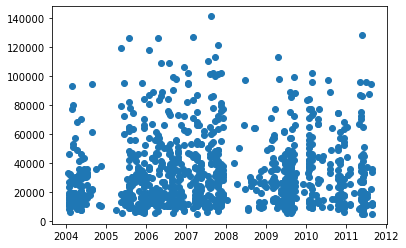

In [7]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

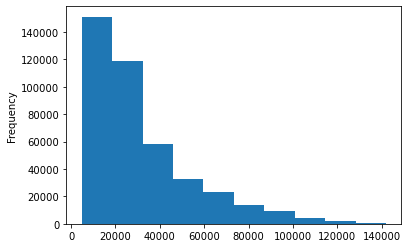

In [8]:
df.SalePrice.plot.hist();

In [9]:
df.head().T



,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [10]:
# sort df by saledate

df.sort_values(by=['saledate'], inplace=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [11]:
dftemp=df.copy()

In [12]:
dftemp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [13]:
dftemp['saleyear']=dftemp['saledate'].dt.year
dftemp['salemonth']=dftemp['saledate'].dt.month
dftemp['saleday']=dftemp['saledate'].dt.day
dftemp['saledayofweek']=dftemp['saledate'].dt.dayofweek
dftemp['saledayofyear']=dftemp['saledate'].dt.dayofyear

In [14]:
dftemp.drop(['saledate'], inplace=True, axis=1)

In [15]:
dftemp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [16]:
dftemp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [17]:
##  split data into train and validation sets
from sklearn.model_selection import train_test_split

xtrain,  xval, ytrain, yval = train_test_split(dftemp.drop(['SalePrice'],axis=1), dftemp['SalePrice'])

In [18]:
print(xtrain.shape, ytrain.shape)
print(xval.shape, yval.shape)

(309523, 56) (309523,)
(103175, 56) (103175,)


In [19]:
## convert strings to numerical category values --> in xtrain, xval

for label, content in xtrain.items():
    if pd.api.types.is_string_dtype(content):
        xtrain[label]=content.astype('category').cat.as_ordered()
        
for label, content in xval.items():
    if pd.api.types.is_string_dtype(content):
        xval[label]=content.astype('category').cat.as_ordered()

In [20]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309523 entries, 369569 to 41524
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   309523 non-null  int64   
 1   MachineID                 309523 non-null  int64   
 2   ModelID                   309523 non-null  int64   
 3   datasource                309523 non-null  int64   
 4   auctioneerID              294483 non-null  float64 
 5   YearMade                  309523 non-null  int64   
 6   MachineHoursCurrentMeter  110402 non-null  float64 
 7   UsageBand                 55167 non-null   category
 8   fiModelDesc               309523 non-null  category
 9   fiBaseModel               309523 non-null  category
 10  fiSecondaryDesc           203971 non-null  category
 11  fiModelSeries             44107 non-null   category
 12  fiModelDescriptor         55958 non-null   category
 13  ProductSize              

In [21]:
xval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103175 entries, 258726 to 268267
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   103175 non-null  int64   
 1   MachineID                 103175 non-null  int64   
 2   ModelID                   103175 non-null  int64   
 3   datasource                103175 non-null  int64   
 4   auctioneerID              98079 non-null   float64 
 5   YearMade                  103175 non-null  int64   
 6   MachineHoursCurrentMeter  37102 non-null   float64 
 7   UsageBand                 18503 non-null   category
 8   fiModelDesc               103175 non-null  category
 9   fiBaseModel               103175 non-null  category
 10  fiSecondaryDesc           68000 non-null   category
 11  fiModelSeries             14560 non-null   category
 12  fiModelDescriptor         18858 non-null   category
 13  ProductSize             

In [22]:
xtrain.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [23]:
xtrain.state.cat.codes

369569     0
283151    29
20161     32
353809     2
12086     21
          ..
302403    37
232062    37
207268    37
336414     4
41524     34
Length: 309523, dtype: int8

In [24]:
xval.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [25]:
xval.state.cat.codes

258726    11
276615    19
42393     37
365846    43
138906     8
          ..
345436     4
336182     8
16511      5
6099      11
268267    43
Length: 103175, dtype: int8

In [26]:
## check missing values  --> in xtrain, xval

for label, content in xtrain.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            
for label, content in xval.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter
auctioneerID
MachineHoursCurrentMeter


In [27]:
## fill missing values with median  --> in xtrain, xval

for label, content in xtrain.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            xtrain[label+'_is_missing']=pd.isnull(content)
            xtrain[label]=content.fillna(content.median())
            
for label, content in xval.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            xval[label+'_is_missing']=pd.isnull(content)
            xval[label]=content.fillna(content.median())

In [28]:
xtrain.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
369569,2629655,1233790,4640,149,26.0,1995,0.0,NaN,410D,410,...,NaN,NaN,NaN,2010,9,8,2,251,False,False
283151,1894507,1547526,20307,132,2.0,1000,0.0,NaN,VIO30,VIO30,...,NaN,NaN,NaN,2008,3,27,3,87,False,True
20161,1209216,108843,3546,121,3.0,1000,8299.0,Medium,426B,426,...,NaN,NaN,NaN,2010,12,2,3,336,False,False
353809,2421961,1399745,11989,136,1.0,2005,2462.0,Medium,PC300LC7,PC300,...,NaN,NaN,NaN,2009,11,20,4,324,False,False
12086,1178856,1066870,3206,121,3.0,1000,0.0,NaN,680E,680,...,NaN,NaN,NaN,2008,5,1,3,122,False,False


In [29]:
xval.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
258726,1791461,1179798,9572,132,17.0,1979,0.0,NaN,974,974,...,NaN,NaN,NaN,2001,10,2,1,275,False,True
276615,1827719,1204942,17595,132,1.0,2000,0.0,NaN,2000D,2000,...,NaN,NaN,NaN,2006,6,21,2,172,False,True
42393,1283005,1513201,6788,132,18.0,1990,0.0,NaN,580,580,...,NaN,NaN,NaN,1993,7,17,5,198,False,True
365846,2554429,1189042,3878,149,1.0,1991,18110.0,Low,980F,980,...,NaN,Standard,Conventional,2011,3,9,2,68,False,False
138906,1500176,1335590,3537,132,4.0,1995,0.0,NaN,416B,416,...,NaN,NaN,NaN,2007,2,12,0,43,False,True


In [30]:
# check if any numeric missing values  --> xtrain, xval

for lable, content in xtrain.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            
for lable, content in xval.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [31]:
xtrain['auctioneerID_is_missing'].value_counts()

False    294483
True      15040
Name: auctioneerID_is_missing, dtype: int64

In [32]:
xtrain.isna().sum()

SalesID                                     0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              254356
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        105552
fiModelSeries                          265416
fiModelDescriptor                      253565
ProductSize                            162599
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           229071
Enclosure                                 250
Forks                                  161125
Pad_Type                          

In [33]:
# changing categorical values into numbers  --> xtrain, xval

for label, content in xtrain.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
print("-----------------------------------------------")        
for label, content in xval.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
-----------------------------------------------
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouse

In [34]:
pd.Categorical(xtrain['state']).dtype


CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
                 ordered=True)

In [35]:
pd.Categorical(xval['state']).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'West Virginia',
                  'Wisconsin', 'Wyoming'],
                 ordered=True)

In [36]:
pd.Categorical(xtrain['state']).codes

array([ 0, 29, 32, ..., 37,  4, 34], dtype=int8)

In [37]:
pd.Categorical(xval['state']).codes

array([11, 19, 37, ...,  5, 11, 43], dtype=int8)

In [38]:
# turning categories into numbers and also filling the missing values  with 0 (as missing cat values would be -1)
##  --> xtrain, xval

for label, content in xtrain.items():
    if not pd.api.types.is_numeric_dtype(content):
        xtrain[label+"_is_missing"]=pd.isnull(content)
        xtrain[label]=pd.Categorical(content).codes+1
        
        
for label, content in xval.items():
    if not pd.api.types.is_numeric_dtype(content):
        xval[label+"_is_missing"]=pd.isnull(content)
        xval[label]=pd.Categorical(content).codes+1

In [39]:
xtrain.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [40]:
xval.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [41]:
xtrain.head().T

,369569,283151,20161,353809,12086
SalesID,2629655,1894507,1209216,2421961,1178856
MachineID,1233790,1547526,108843,1399745,1066870
ModelID,4640,20307,3546,11989,3206
datasource,149,132,121,136,121
auctioneerID,26,2,3,1,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,True,True,True,True,True


In [42]:
xval.head().T

,258726,276615,42393,365846,138906
SalesID,1791461,1827719,1283005,2554429,1500176
MachineID,1179798,1204942,1513201,1189042,1335590
ModelID,9572,17595,6788,3878,3537
datasource,132,132,132,149,132
auctioneerID,17,1,18,1,4
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,True,True,True,False,True


In [43]:
%%time
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(xtrain, ytrain)

CPU times: user 16min 28s, sys: 5.4 s, total: 16min 33s
Wall time: 4min 19s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [44]:
model.score(xval, yval)

0.7671421504371547

In [45]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
def rmsle(ytest, ypreds):
    return np.sqrt(mean_squared_log_error(ytest, ypreds))


In [46]:
print('RMSLE on train data : ', rmsle(ytrain, model.predict(xtrain)))
print()
print('RMSLE on validation data: ', rmsle(yval, model.predict(xval)))

RMSLE on train data :  0.08655779330958484

RMSLE on validation data:  0.30589280685545


In [60]:
## Test data predictions

# load test data

dftest = pd.read_csv(filepath+'Test.csv', low_memory=False, parse_dates=['saledate'])


In [61]:
dftest.shape

(12457, 52)

In [63]:
dftest['saleyear']=dftest['saledate'].dt.year
dftest['salemonth']=dftest['saledate'].dt.month
dftest['saleday']=dftest['saledate'].dt.day
dftest['saledayofweek']=dftest['saledate'].dt.dayofweek
dftest['saledayofyear']=dftest['saledate'].dt.dayofyear

dftest.drop(['saledate'], axis=1, inplace=True)

In [64]:
dftest.shape

(12457, 56)

In [65]:
# convert strings to categorical values
for label, content in dftest.items():
    if pd.api.types.is_string_dtype(content):
        dftest[label]=content.astype('category').cat.as_ordered()


In [66]:
dftest.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [67]:
## categories to numbers conversion and also filling missing values with 0  

for label, content in dftest.items():
    if not pd.api.types.is_numeric_dtype(content):
        dftest[label+'_is_missing']=pd.isnull(content)
        dftest[label]=pd.Categorical(content).codes+1

In [68]:
dftest.shape

(12457, 100)

In [69]:
## filling missing values with median for numeric values

for label, content in dftest.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            dftest[label+'_is_missing']=pd.isnull(content)
            dftest[label]=content.fillna(content.median())

In [70]:
dftest.shape

(12457, 101)

In [71]:
set(xtrain.columns)-set(dftest.columns)

{'auctioneerID_is_missing'}

In [72]:
dftest['auctioneerID_is_missing']=False
dftest.shape

(12457, 102)

In [73]:
testpreds=model.predict(dftest)

In [74]:
len(testpreds)

12457

In [75]:
testpreds

array([21191.5, 21590.5, 46405. , ..., 11805. , 18089. , 30465. ])

In [76]:
dfpreds=pd.DataFrame()
dfpreds['SalesID']=dftest['SalesID']
dfpreds['SalesPrice']=testpreds
dfpreds

,SalesID,SalesPrice
0,1227829,21191.5
1,1227844,21590.5
2,1227847,46405.0
3,1227848,82700.0
4,1227863,59196.5
...,...,...
12452,6643171,49890.0
12453,6643173,11585.0
12454,6643184,11805.0
12455,6643186,18089.0


In [77]:
dfpreds.to_csv('/kaggle/working/test_predictions.csv' , index=False)